In [ ]:
import pandas as pd
df=pd.read_excel('/content/sample_data/Innovation Subcategory_bt.xlsx')
#df = pd.DataFrame('/content/sample_data/Innovation Subcategory_bt.xlsx')
#df.columns = ['new technologies']

In [ ]:
df.head()

,Column1,series,ddate,year,crsp_class,Fund_name_from_SEC_filing,comp_cik,combined_sentences,fund_series_label,innovation,...,tech,technical,investment,new technologies,technology sector,Topic 4,Topic 5,Topic 6,Unnamed: 24,Unnamed: 25
0,0,S000004352,20101130,2010,others,ISHARES TRUST,1100663,['The Underlying Index measures the performanc...,technology,0,...,0,0,0,0.0,0.0,0,0,0,NaN,NaN
1,1,S000004352,20111130,2011,others,ISHARES TRUST,1100663,['The Underlying Index measures the performanc...,technology,0,...,0,0,0,0.0,0.0,0,0,0,Case Sensitive,0.0
2,2,S000004352,20121130,2012,others,ISHARES TRUST,1100663,['The Underlying Index measures the performanc...,technology,0,...,0,0,0,0.0,0.0,0,0,0,improvement,850.0
3,3,S000004352,20130630,2013,others,ISHARES TRUST,1100663,['The Underlying Index measures the performanc...,technology,0,...,0,0,0,0.0,0.0,0,0,0,improvements,694.0
4,4,S000004352,20131130,2013,others,ISHARES TRUST,1100663,['The Fund seeks to track the investment resul...,technology,0,...,0,0,0,0.0,1.0,0,0,0,new technologies,1087.0


In [12]:
import pandas as pd
df_risk=pd.read_excel('/content/sample_data/NewKeyword_Tech_Risk (1).xlsx')

In [13]:
df_risk = df_risk.sample(n=250)

In [14]:
df_risk.head()

,Unnamed: 0,series,ddate,year,crsp_class,Fund_name_from_SEC_filing,comp_cik,combined_sentences,fund_series_label,innovation,...,technology,tech,technical,investment,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
71988,71988,S000072049,20210630,2021,Missing,TIDAL ETF TRUST,1742912,['when a better higher utility solution become...,tech,0,...,0,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN
32630,32630,S000003074,20201130,2020,DE,PROFUNDS,1039803,['Natural Disaster Epidemic Risk Natural or en...,disruptive,0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
65650,65650,S000060194,20220430,2022,FE,RMB INVESTORS TRUST,30126,['The adviser will apply its investment techni...,tech,0,...,0,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN
6307,6307,S000020614,20110228,2011,Missing,POWERSHARES EXCHANGE-TRADED FUND TRUST II,1378872,['In managing such an Underlying ETF s portfol...,tech,0,...,0,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN
16049,16049,S000009442,20201231,2020,DE,MAINSTAY VP FUNDS TRUST,887340,['In addition larger companies may be less cap...,technology,0,...,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df_risk.to_excel(r'/content/sample_data/250_risk.xlsx', sheet_name='risk', index=False)

# New Section

In [ ]:
df_risk = df_risk.sample(n=101)

In [ ]:
!pip install textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from textblob import TextBlob
df['polarity'] = df['combined_sentences'].apply(lambda x: TextBlob(x).polarity)
df['subjective'] = df['combined_sentences'].apply(lambda x: TextBlob(x).subjectivity)

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stoplist = stopwords.words('english') + ['though']


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
c_vec = CountVectorizer(stop_words=stoplist, ngram_range=(2,3))
# matrix of ngrams
ngrams = c_vec.fit_transform(df['combined_sentences'])
# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)
# list of ngrams
vocab = c_vec.vocabulary_
df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'bigram/trigram'})

In [ ]:
df_ngram.head(30)

,frequency,bigram/trigram
0,150,etf global
1,120,opinion engaged
2,120,limited companies
3,120,include limited companies
4,120,include limited
5,108,fidelity disruptive
6,108,disruptive technology
7,106,least 80
8,96,limited companies adviser
9,96,companies adviser opinion


In [ ]:
df_ngram['polarity'] = df_ngram['bigram/trigram'].apply(lambda x: TextBlob(x).polarity)
df_ngram['subjective'] = df_ngram['bigram/trigram'].apply(lambda x: TextBlob(x).subjectivity)

In [ ]:
df_ngram.head(30)

,frequency,bigram/trigram,polarity,subjective
0,15077,information technology,0.000,0.000
1,9716,fund may,0.000,0.000
2,8044,health care,0.000,0.000
3,6122,consumer discretionary,0.000,0.000
4,5808,technology companies,0.000,0.000
5,5619,investment techniques,0.000,0.000
6,5334,technology sector,0.000,0.000
7,4909,underlying index,0.000,0.000
8,3843,purchase sale,0.000,0.000
9,3541,significant portion,0.375,0.875


In [ ]:
disruptive = df.loc[df['disruptive'] == 1]
new_tech = df.loc[df['new technologies'] == 1]
tech_sector=df.loc[df['technology sector'] == 1]

In [ ]:
disruptive.shape

(127, 28)

In [ ]:
c_vec = CountVectorizer(stop_words=stoplist, ngram_range=(2,3))
# matrix of ngrams
ngrams = c_vec.fit_transform(disruptive['combined_sentences'])
# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)
# list of ngrams
vocab = c_vec.vocabulary_
df_dis = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'bigram/trigram'})


In [ ]:
df_dis.head(10) #in general talks about a particular method/technique led to growth/disruptive growth of company 
#,also whivh sectors it contributed in growth

,frequency,bigram/trigram
0,150,etf global
1,120,opinion engaged
2,120,limited companies
3,120,include limited companies
4,120,include limited
5,108,fidelity disruptive
6,108,disruptive technology
7,106,least 80
8,96,limited companies adviser
9,96,companies adviser opinion


In [ ]:
c_vec = CountVectorizer(stop_words=stoplist, ngram_range=(2,3))
ngrams= c_vec.fit_transform(new_tech['combined_sentences'])
count_values = ngrams.toarray().sum(axis=0)
df_new_tech = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'bigram/trigram'})


In [ ]:
df_new_tech.head(15) #speaks about wide range of sectors and how new technology gives company an edge 

,frequency,bigram/trigram
0,300,commerce theme
1,300,commerce selecting companies
2,267,stock selection
3,256,full market
4,168,therapies liquid
5,168,themes underlying index
6,147,exposure health care
7,147,exposure health
8,142,commerce companies relevant
9,141,materials identified


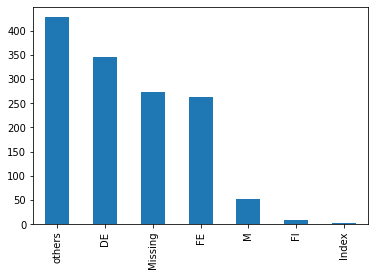

In [ ]:
import matplotlib.pyplot as plt
new_tech['crsp_class'].value_counts().plot(kind='bar')
plt.show()

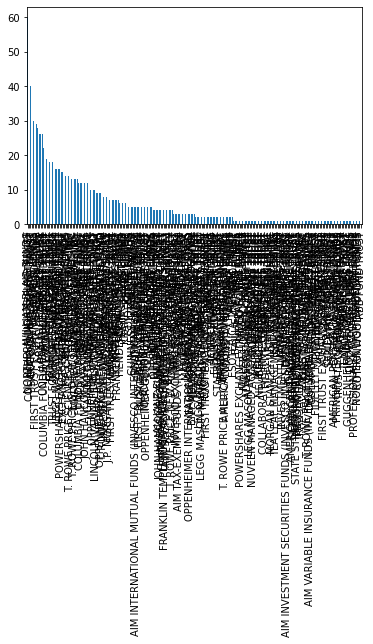

<Figure size 8000x4000 with 0 Axes>

In [ ]:
from matplotlib.pyplot import figure
new_tech['Fund_name_from_SEC_filing'].value_counts().plot(kind='bar')
figure(figsize=(100, 50), dpi=80)
plt.show()


In [ ]:
c_vec = CountVectorizer(stop_words=stoplist, ngram_range=(2,3))
ngrams = c_vec.fit_transform(tech_sector['combined_sentences'])
count_values = ngrams.toarray().sum(axis=0)
df_tech_sector = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'bigram/trigram'})
                                   

In [ ]:
df_tech_sector.head(15) #speaks about funds investing in IT/economic sectors

,frequency,bigram/trigram
0,526,products alliances
1,288,devices fidelity disruptive
2,288,devices fidelity
3,280,index constructed eligible
4,272,operation business
5,272,operating within disruptive
6,250,enhancement include companies
7,250,enhancement include
8,244,products services
9,154,sector geographic
